## BME i9400
## Fall 2024
### Homework 4: Stratified K-Fold Cross Validation and L2 Regularized Logistic Regression


**Due date: Wednesday, November 13th 2024, 11:59:59.987 PM EST**

In this homework, you will implement a logistic regression model with L2 regularization, and evaluate it using stratified K-Fold cross-validation.

Stratification refers to the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.

In the cells below, I have indicated places where code needs to be added with instructions contained in double hashtags (for example ## DO SOMETHING ##). 

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

### Set the random seed

In [15]:
## DO NOT MODIFY THIS CELL
np.random.seed(42)

### Load the data

In [16]:
## DO NOT MODIFY THIS CELL
df = pd.read_csv('parkinsons.csv')
labels = df["status"].values
features = df.drop(columns=["status", "name"]).values
features.shape, labels.shape

((195, 22), (195,))

### Create an instance of the StratifiedKFold class with 5 folds

In [17]:
## DO NOT MODIFY THIS CELL
skf = StratifiedKFold(n_splits=5)

### Task 1 
**Evaluate a logistic regression model on this dataset using 5-fold stratified cross-validation.**
- You should use the model object created in the above cell
- Do not regularize the classifier!
- Use a value for ```max_iter``` of 10000 and disregard any convergence warnings
- For each of the five folds, compute the area under the ROC curve and the average precision, storing each of them in a list
- Report the average area under the ROC curve and the average average precision across the five folds

In [18]:
rocs = []
prcs = []

## Add code for cross-validation here
# Cross-validation loop
for train_index, test_index in skf.split(features, labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    ## Fit the model
    model = LogisticRegression(max_iter = 10000)
    model.fit(X_train, y_train)
        
    ## Predict the probabilities
    probs = model.predict_proba(X_test)[:, 1]
    
    ## Compute the ROC and average precision
    rocs.append(roc_auc_score(y_test, probs))
    prcs.append(average_precision_score(y_test, probs))

    
## Report AUROC and average precision here
for i in range(5):
    print(f"Fold {i+1}: AUROC = {rocs[i]}, Average Precision = {prcs[i]}")

Fold 1: AUROC = 0.9851851851851852, Average Precision = 0.9958585858585858
Fold 2: AUROC = 0.8962962962962964, Average Precision = 0.971220575348449
Fold 3: AUROC = 0.9137931034482758, Average Precision = 0.9660051337910258
Fold 4: AUROC = 0.5344827586206896, Average Precision = 0.8217492115466649
Fold 5: AUROC = 0.6620689655172414, Average Precision = 0.873267805073096


### Task 2
**Repeat Task 1, but this time adding L2 to the logistic regression model.**
- You must evaluate the following values for the hyperparameter ```C```
    - C: 0.01, 0.1, 1, 10, 100, 1000, 10000
- For each hyperparameter value, compute the average area under the ROC curve and the average average precision across the five folds, and store them in a list or numpy array
- Use a sufficiently large value for the ```max_iter``` parameter of the LogisticRegression class to avoid convergence warnings.
- Report the highest value of the average area under the ROC curve and the average average precision.
- Also report the hyperparameters that yield the best average area under the ROC curve and the average average precision.
- Create a plot with L2 hyperparameter on the x-axis, and average ROC and average precision on the y-axis (overlaid) -- use a logarithmic scale for the x-axis.


In [19]:
cc = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
rocs = np.zeros(shape = (len(cc), 5))
prcs = np.zeros(shape = (len(cc), 5))

## Add code for cross-validation here
# Cross-validation loop
for i, c in enumerate(cc):
    for j, (train_index, test_index) in enumerate(skf.split(features, labels)):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
    
        ## Fit the model
        model = LogisticRegression(penalty = 'l2',max_iter = 10000, C = c)
        model.fit(X_train, y_train)
        
        ## Predict the probabilities
        probs = model.predict_proba(X_test)[:, 1]
    
        ## Compute the ROC and average precision
        rocs[i, j] = roc_auc_score(y_test, probs)
        prcs[i, j] = average_precision_score(y_test, probs)
        

In [20]:
## Compute the average auroc and average average precision for each value of cc
aurocs = np.mean(rocs, axis = 1)
aprcs = np.mean(prcs, axis = 1)
print(aurocs)
print(aprcs)
## Report the highest values of the average auroc and average average precision here
print(f"Highest AUROC: {np.max(aurocs)}")
print(f"Highest Average Precision: {np.max(aprcs)}")

[0.66120051 0.69706258 0.74332056 0.79836526 0.80727969 0.78600255
 0.76750958 0.75923372]
[0.85338248 0.86789257 0.88775811 0.92562026 0.93202133 0.9246429
 0.91880084 0.91427672]
Highest AUROC: 0.80727969348659
Highest Average Precision: 0.9320213304052842


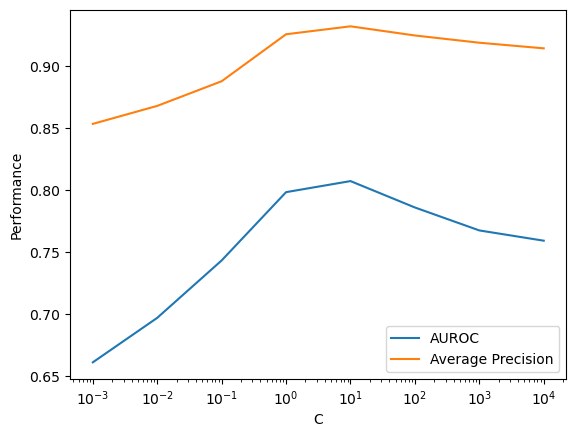

In [21]:
## Create the plot here
plt.plot(cc, aurocs, label = "AUROC")
plt.plot(cc, aprcs, label = "Average Precision")
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [22]:
## Report the hyperparameters that yield the best performance here
best_auroc = cc[np.argmax(aurocs)]
best_aprc = cc[np.argmax(aprcs)]
print(f"Best AUROC: {best_auroc}")
print(f"Best Average Precision: {best_aprc}")

Best AUROC: 10
Best Average Precision: 10
